#### Import all the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor
import seaborn as sns
%matplotlib inline

In [2]:
air_quality_df = pd.read_csv("AirQualityUCI.csv")

In [3]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [4]:
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


*** Lets remove unnamed columns or features

In [5]:
air_quality_df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [6]:
air_quality_df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

*** Since there are very less missing values in the features we will  be dropping those values.

In [7]:
air_quality_df = air_quality_df.dropna()

In [8]:
air_quality_df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [9]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [10]:
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


#### EDA

In [11]:
air_quality_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


*** The values are not distributed normally. Lot of skewness observed in many columns. Std is higher than mean in many features.

In [12]:
correlation = air_quality_df.corr()
correlation

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


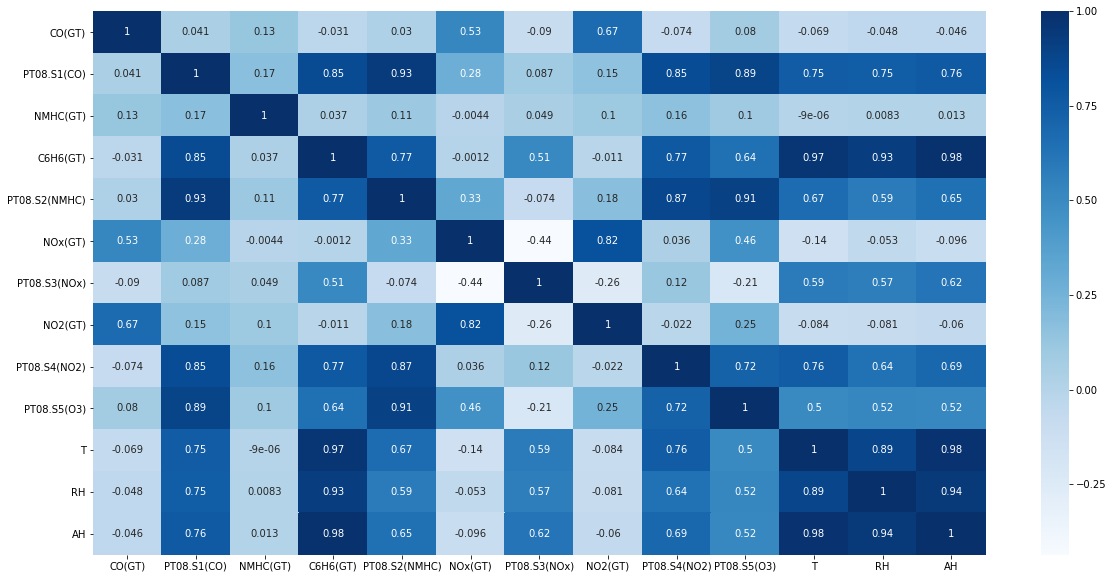

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, cmap='Blues', annot=True)
plt.show()

*** RH has high correlation with columns like c6h6(gt), T and AH. Those can be dropped for simplifying the dataset. Its optional.

In [14]:
print(air_quality_df['Date'].value_counts())
print(air_quality_df['Time'].value_counts())

9/20/2004     24
8/4/2004      24
8/15/2004     24
4/15/2004     24
1/24/2005     24
1/28/2005     24
7/11/2004     24
12/3/2004     24
12/10/2004    24
10/14/2004    24
8/30/2004     24
6/20/2004     24
11/2/2004     24
10/21/2004    24
6/13/2004     24
3/8/2005      24
7/6/2004      24
4/17/2004     24
6/27/2004     24
2/24/2005     24
6/12/2004     24
9/9/2004      24
2/1/2005      24
2/27/2005     24
3/22/2005     24
11/8/2004     24
2/3/2005      24
3/28/2004     24
3/21/2004     24
8/5/2004      24
              ..
10/6/2004     24
6/5/2004      24
11/14/2004    24
11/10/2004    24
3/26/2004     24
1/20/2005     24
8/8/2004      24
8/19/2004     24
3/13/2004     24
1/22/2005     24
7/5/2004      24
11/24/2004    24
12/15/2004    24
4/30/2004     24
4/25/2004     24
6/8/2004      24
5/11/2004     24
5/3/2004      24
12/5/2004     24
1/1/2005      24
10/7/2004     24
6/2/2004      24
8/2/2004      24
3/25/2004     24
6/19/2004     24
3/6/2005      24
5/8/2004      24
12/22/2004    

*** Since there are many unique values in Date and Time column we will be dropping them from the data frame.

In [15]:
air_quality_df.drop(['Date', 'Time'], axis=1, inplace=True)

In [16]:
# air_quality_df = air_quality_df.astype(int)

In [17]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13)
memory usage: 1023.4 KB


## Different models to make prediction for supervised learning 

### Splitting features and labels 

In [18]:
y = air_quality_df['RH']
x = air_quality_df.drop('RH', axis=1) 

### Train and test splitting 

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7485, 12)
(1872, 12)
(7485,)
(1872,)


### Create a instance of the model

In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=6)

### Fit the model on the training data

In [22]:
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

### Predict on the test data

In [23]:
predict_y = model.predict(x_test)
predict_y
print("Predicted values count", len(predict_y))

predicted_values_pd = pd.DataFrame(predict_y, columns=['PredictedValues'])
predicted_values_pd.head()

Predicted values count 1872


,PredictedValues
0,50.990802
1,44.581557
2,38.546753
3,38.546753
4,70.601653


### Evaluate the model performance

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE from Decision tree regressor is ",mean_squared_error(y_test, predict_y))
print("MAE from Decision tree regressor is ",mean_absolute_error(y_test, predict_y))
print("R2 score from Decision tree regressor is",r2_score(y_test, predict_y))


MSE from Decision tree regressor is  45.499709550785475
MAE from Decision tree regressor is  5.1215732588955944
R2 score from Decision tree regressor is 0.9826323215642794


In [25]:
dt_results_df = pd.DataFrame()

dt_results_df["Actual Values"] = y_test
dt_results_df["Predicted Values"] = predict_y

dt_results_df.head()

,Actual Values,Predicted Values
1121,31.7,50.990802
8028,43.6,44.581557
3803,45.6,38.546753
4595,46.7,38.546753
587,66.5,70.601653


### Linear regression prediction for regression problem

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_model = LinearRegression()

In [28]:
lin_model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred_linear = lin_model.predict(x_test)

In [30]:
print("MSE from Linear regression is", mean_squared_error(y_test, y_pred_linear))
print("MAE from Linear regression is ", mean_absolute_error(y_test, y_pred_linear))
print("R2 score from Linear regression is",r2_score(y_test, y_pred_linear))

MSE from Linear regression is 63.14272111648029
MAE from Linear regression is  6.273004837093392
R2 score from Linear regression is 0.9758978137061869


In [31]:
results_df = pd.DataFrame()

In [32]:
results_df["Actual Values"] = y_test
results_df["Predicted Values"] = y_pred_linear

In [33]:
results_df.head()

,Actual Values,Predicted Values
1121,31.7,37.937270
8028,43.6,53.690832
3803,45.6,46.980878
4595,46.7,40.533700
587,66.5,73.647747


### KNN for regression prediction 

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [35]:
neighbours_list = [1,3,5,6,7,8,10]

In [36]:
for k in neighbours_list:
    knn_model = KNeighborsRegressor(n_neighbors = k)
    cross_validation_score = cross_val_score(knn_model, x_test, y_test, cv=10)
    print("Neighbours:", k)
    print("Cross val score :", str(cross_validation_score))
    print("Mean score:", str(cross_validation_score.mean()))
    print("")

Neighbours: 1
Cross val score : [0.92059161 0.90163586 0.94248879 0.86544554 0.92975871 0.92234027
 0.96161729 0.91502394 0.87349019 0.91406548]
Mean score: 0.9146457671192678

Neighbours: 3
Cross val score : [0.93921108 0.94242739 0.95525373 0.8863976  0.94445337 0.94733705
 0.96543442 0.92566645 0.91850947 0.9402383 ]
Mean score: 0.9364928858703674

Neighbours: 5
Cross val score : [0.93624079 0.93957875 0.95567027 0.88396607 0.94802307 0.94778924
 0.96688909 0.9344521  0.92743835 0.94536172]
Mean score: 0.9385409464975337

Neighbours: 6
Cross val score : [0.93665519 0.94139823 0.95456984 0.88158502 0.95063792 0.94797071
 0.96599488 0.93586918 0.92621829 0.94218286]
Mean score: 0.9383082134320013

Neighbours: 7
Cross val score : [0.93609    0.93835945 0.95339239 0.88032918 0.95019968 0.94659591
 0.96615965 0.93667295 0.92599739 0.94102132]
Mean score: 0.937481792579787

Neighbours: 8
Cross val score : [0.93457939 0.93448388 0.9566524  0.88071308 0.95081833 0.94910726
 0.96652282 0.934

*** Best mean score is available for 6 neighbours. Hence we will choose 6 neighbours for model building

In [37]:
knn_reg_model = KNeighborsRegressor(n_neighbors=6)

In [38]:
knn_reg_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [39]:
y_pred_knn = knn_reg_model.predict(x_test)

In [40]:
print("MSE from KNN is", mean_squared_error(y_test, y_pred_knn))
print("MAE from KNN is ", mean_absolute_error(y_test, y_pred_knn))
print("R2 score from KNN is",r2_score(y_test, y_pred_knn))

MSE from KNN is 104.36531680318139
MAE from KNN is  7.606187678062677
R2 score from KNN is 0.9601627509279678


In [41]:
results_knn_df = pd.DataFrame()

In [42]:
results_knn_df["Actual Values"] = y_test
results_knn_df["Predicted Values"] = y_pred_knn

results_knn_df.head()

,Actual Values,Predicted Values
1121,31.7,33.116667
8028,43.6,52.333333
3803,45.6,53.683333
4595,46.7,48.466667
587,66.5,69.283333


## Since the mean squared error and mean absolute error of the Decision Tree Regressor model is low compared to other models, also the R2 score of the DT regressor is best which indicates predicted values correlates closely with actual value. Hence we can go with DT predicted values.

#### XGBoostRegression

In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}

# ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
#              'objective': 'reg:linear'}
# optimized_GBM = GridSearchCV(XGBRegressor(**ind_params), 
#                             cv_params, 
#                              scoring = 'accuracy', cv = 5, n_jobs = -1) 
        
xgbRegressor = XGBRegressor()
optimized_GBM = GridSearchCV(xgbRegressor, cv_params, scoring = 'r2', cv = 5, n_jobs = -1)

In [45]:
optimized_GBM.fit(x_train, y_train)

C:\Users\karthikeya\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
             scoring='r2')

In [46]:
optimized_GBM.cv_results_

# optimized_GBM.best_params_

{'mean_fit_time': array([1.77370143, 5.27841902, 3.03337355, 3.40406704, 2.45437999,
        2.5091434 , 4.07543321, 4.37485018, 4.47085576]),
 'std_fit_time': array([0.48499893, 4.91237862, 1.44732674, 0.9230684 , 0.21701065,
        0.43775052, 1.36226998, 0.4693961 , 0.74866753]),
 'mean_score_time': array([0.01720095, 0.05000296, 0.02040114, 0.02544112, 0.02220135,
        0.02280135, 0.03060179, 0.03160172, 0.03080158]),
 'std_score_time': array([0.00256132, 0.06102492, 0.00392959, 0.00483033, 0.0014699 ,
        0.00213559, 0.0014967 , 0.00249808, 0.00391946]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
 

*** We can clearly see the combination of max_depth = 3 and min_child_weight = 1 is the best combination. Its evident from the scores.

In [47]:
import xgboost
xgdmat = xgboost.DMatrix(x_train, y_train)

In [48]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:squarederror', 'max_depth':3, 'min_child_weight':1} 

xgb_optimised = xgboost.cv(params=our_params, dtrain=xgdmat, num_boost_round=3000, nfold = 5, metrics = ['error'], early_stopping_rounds = 100)

In [49]:
final_xgb = xgboost.train(our_params, xgdmat, num_boost_round = 500)

In [50]:
test_xgdmat = xgboost.DMatrix(x_test)

In [51]:
ypred_xgboost = final_xgb.predict(test_xgdmat)

In [52]:
print("MSE from XGBoost is", mean_squared_error(y_test, ypred_xgboost))
print("MAE from XGBoost is ", mean_absolute_error(y_test, ypred_xgboost))
print("R2 score from XGBoost is",r2_score(y_test, ypred_xgboost))

MSE from XGBoost is 0.817421649258496
MAE from XGBoost is  0.6900599206614698
R2 score from XGBoost is 0.9996879822642633


In [53]:
results_xgboost_df = pd.DataFrame()

results_xgboost_df["Actual Values"] = y_test
results_xgboost_df["Predicted Values"] = ypred_xgboost

results_xgboost_df.head()

,Actual Values,Predicted Values
1121,31.7,32.668896
8028,43.6,43.598034
3803,45.6,45.742764
4595,46.7,47.593399
587,66.5,66.646126


*** XGBoostRegressor seems to be the best model for making the continuous value predictions with very high R2 score compared to other models mentioned above 

### Lets try stacking now and see whether we will get better results 

#### The above mentioned models act like the base models in stacking. We should not train the base models with the full training data and testing data for predictions. It will lead to over fitting. Hence we do a split on the training data.

In [54]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

base_learners = list()
base_learners.append(('Decision tree', model)) 
base_learners.append(('Linear regression', lin_model))
base_learners.append(('Knn', knn_reg_model))   
    
stacked_model = StackingRegressor(estimators=base_learners, final_estimator=xgb, cv=5)


In [55]:
print(type(stacked_model))

<class 'sklearn.ensemble._stacking.StackingRegressor'>


In [56]:
stacked_model.fit(x_train, y_train)

[21:32:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=5,
                  estimators=[('Decision tree',
                               DecisionTreeRegressor(max_depth=6)),
                              ('Linear regression', LinearRegression()),
                              ('Knn', KNeighborsRegressor(n_neighbors=6))],
                  final_estimator=XGBRegressor())

In [57]:
stack_pred = stacked_model.predict(x_test)

In [58]:
print("MSE from stacking is", mean_squared_error(y_test, stack_pred))
print("MAE from stacking is ", mean_absolute_error(y_test, stack_pred))
print("R2 score from stacking is",r2_score(y_test, stack_pred))

MSE from stacking is 21.481059777227884
MAE from stacking is  3.518651130464342
R2 score from stacking is 0.9918004720831686


### Compared to XGBoost, Stacking gives same output in terms of R2 score.